## Лабораторная работа

### Демешко Алеся, 797

### Практическая часть
Требуется реализовать четыре алгоритма.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### 1. Градиентный спуск
Основная идея метода заключается в том, чтобы осуществлять оптимизацию в направлении наискорейшего спуска, а это направление задаётся антиградиентом: $-\nabla f$: <br>
$x^{[k+1]} = x^{[k]} - \lambda^{[k]}\nabla f(x^{[k]})$
где $\lambda^{[k]}$ выбирается
* постоянной, в этом случае метод может расходиться; <br>
* дробным шагом, т.е. длина шага в процессе спуска делится на некое число; <br>
* наискорейшим спуском: $\lambda^{[k]} = argmin_{\lambda} f(x^{[k]} - \lambda^{[k]}\nabla f(x^{[k]}))$ <br>
В качестве критерия остановки возьмём $\|x^{[k+1]} - x^{[k]}\| \leqslant \varepsilon$

В качестве первой исследуемой функции возьмём функцию из домашнего задания $f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$. Там мы получили точку минимума $(0, 1)$.

In [152]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

Для построения графиков нам надо куда-то записывать данные. Для этого подготовим три массива для значений градиента по трём массивам. Также подготовим массивы для построения 3D графика нашей функции.

In [153]:
X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

In [154]:
def gradient_descent(a, x_k, y_k): #в качестве параметра будем подставлять alpha и координаты точки старта
    eps = 1e-10 #эпсилон для критерия остановки                       поиска минимума функции
    stop_criterion = 1 #критерий остановки
    while(stop_criterion > eps):
        x_k1 = x_k - a * gradient_x(x_k) #считаем значение
        y_k1 = y_k - a * gradient_y(y_k) #градиента в точках
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2) #обновляем критерий остановки
        x_k = x_k1 #обновляем значения
        y_k = y_k1 #x_k и y_k
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

In [155]:
min_x, min_y = gradient_descent(0.001, 7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

Координата x, найденная градиентным спуском: 2.488437564412295e-08
Координата y, найденная градиентным спуском: 1.0000000000000138
Количество итераций : 4854


Итак, сравним полученную точку с теоретической. Видим, что они отличаются на пренебрежительно маленькую величину. Значит, градиентный спуск действительно работает. Теперь нарисуем графики.

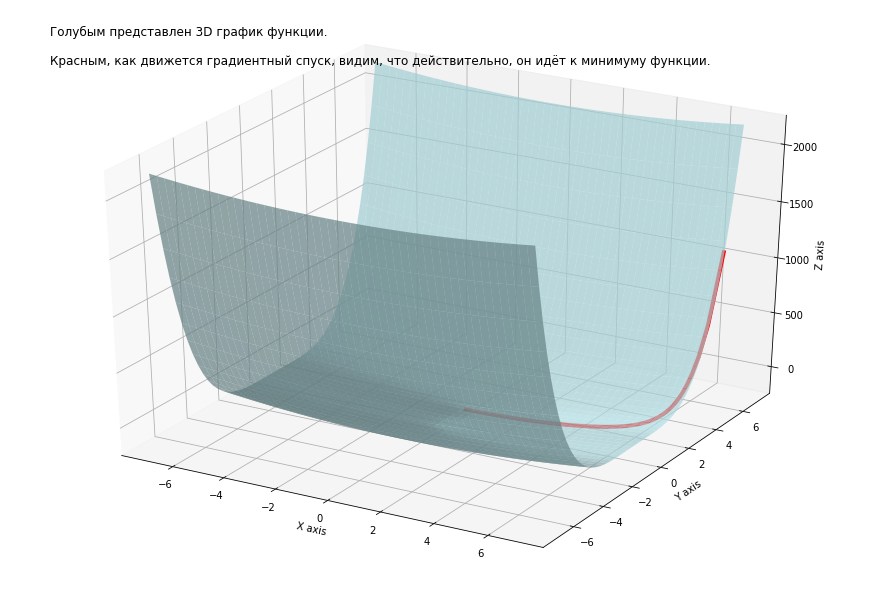

Теперь посмотрим на проекцию градиентного спуска на ось XY. Он стремится к точке (0, 1).
Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.


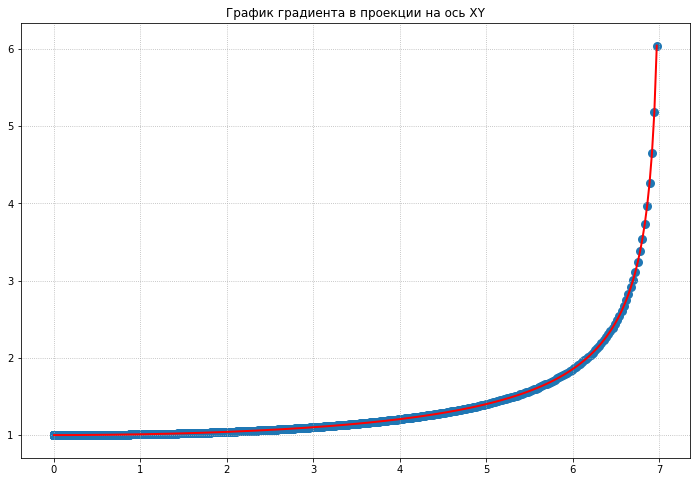

In [156]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1, Y1, Z1, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется градиентный спуск, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Теперь посмотрим на проекцию градиентного спуска на ось XY. Он стремится к точке (0, 1).')
print('Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График градиента в проекции на ось XY')
plt.grid(ls=':')
plt.show()

Теперь посмотрим как влияет выбор параметра $\alpha$.

In [7]:
list_of_alpha = [0.0005, 0.001, 0.002, 0.0025, 0.004, 0.005, 0.006, 0.01, 0.05, 0.08, 0.1] #рассмотрим
list_of_alpha = np.array(list_of_alpha)                                                        #такие alpha

In [8]:
number_of_iteration = []
coor_x = []
coor_y = []

In [9]:
def gradient(a, x_k, y_k): #в качестве параметра будем подставлять alpha и координаты точки старта
    eps = 1e-10 #эпсилон для критерия остановки                       поиска минимума функции
    stop_criterion = 1 #критерий остановки
    iteration = 0
    while(stop_criterion > eps):
        x_k1 = x_k - a * gradient_x(x_k) #считаем значение
        y_k1 = y_k - a * gradient_y(y_k) #градиента в точках
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2) #обновляем критерий остановки
        x_k = x_k1 #обновляем значения
        y_k = y_k1 #x_k и y_k
        iteration = iteration + 1
    return x_k, y_k, iteration

In [10]:
for x in list_of_alpha:
    min_x, min_y, iteration = gradient(x, 7, 10)
    number_of_iteration.append(iteration)
    coor_x.append(min_x)
    coor_y.append(min_y)

/home/alesya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/home/alesya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [11]:
comprasion_alpha = pd.DataFrame({"list_of_alpha": list_of_alpha, "coor_x": coor_x, "coor_y": coor_y, "number_of_iteration": number_of_iteration})
comprasion_alpha

,list_of_alpha,coor_x,coor_y,number_of_iteration
0,0.0005,4.981962e-08,1.0,9371
1,0.0010,2.488438e-08,1.0,4854
2,0.0020,1.238464e-08,1.0,2509
3,0.0025,9.846291e-09,1.0,2028
4,0.0040,6.134234e-09,-1.0,1293
5,0.0050,4.843074e-09,-1.0,1044
6,0.0060,5.625309e+00,NaN,9
7,0.0100,5.049727e+00,NaN,8
8,0.0500,1.468006e+00,NaN,7
9,0.0800,4.706092e-01,NaN,7


Видим, что примерно с $\alpha > 0.0025$ градиентный спуск не сходится из-за того, что у нас в функции есть четвёртая степень и при большой $\alpha$ значение $y^{[k]}$ начинает расти. Также видим, что при $\alpha = 0.004$ и $\alpha = 0.005$ градиентный спуск нашёл седловую точку $(0, -1)$ и не может выйти из неё. Также заметим, что с увеличением $\alpha$ количество итераций увеличивается.

Теперь посмотрим, что будет происходить, если взять $\alpha$ не const, а дробным шагом, где $\frac{1}{n}$, где $n$ номер итерации плюс 1000, чтобы не случился 'Numerical result out of range'.

In [116]:
def gradient_descent_a(x_k, y_k): #в качестве параметра будем подставлять alpha и координаты точки старта
    eps = 1e-10 #эпсилон для критерия остановки                       поиска минимума функции
    stop_criterion = 1 #критерий остановки
    n = 1000
    while(stop_criterion > eps):
        x_k1 = x_k - (1 / n) * gradient_x(x_k) #считаем значение
        y_k1 = y_k - (1 / n) * gradient_y(y_k) #градиента в точках
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2) #обновляем критерий остановки
        x_k = x_k1 #обновляем значения
        y_k = y_k1 #x_k и y_k
        n = n + 1
    print('Количество итераций равно ', end = '')
    print(n - 1000)
    return x_k, y_k

In [13]:
min_x, min_y = gradient_descent_a(7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)

Количество итераций равно 47819
Координата x, найденная градиентным спуском: 1.2203432758144122e-06
Координата y, найденная градиентным спуском: 1.0000000000004359


Из полученных результатов можем сделать вывод, что при таком выборе $\alpha$ ответ получается довольно точным, но нужно больше итераций.

Рассмотрим сильно выпуклую функцию $f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$, её минимум это точка $(1, -1)$

In [124]:
def f(x, y):
    return (1 - x) ** 2 + (y + x ** 2) ** 2

def gradient_x(point_x, point_y):
    return -2 + 2 * point_x + 4 * point_x * point_y + 4 * point_x ** 3

def gradient_y(point_x, point_y):
    return 2 * point_y + 2 * point_x ** 2

Координата x, найденная градиентным спуском: 0.999999888525303
Координата y, найденная градиентным спуском: -0.9999997308762827
Действительно, найдена пренебрежимо малую величину точка минимума
Количество итераций: 44845


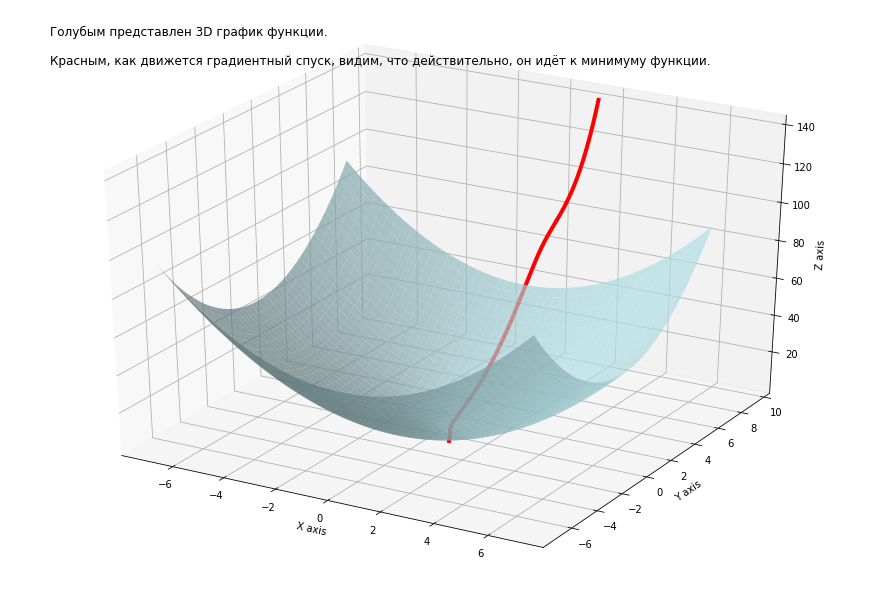

Теперь посмотрим на проекцию градиентного спуска на ось XY. Он стремится к точке (-1, 1).


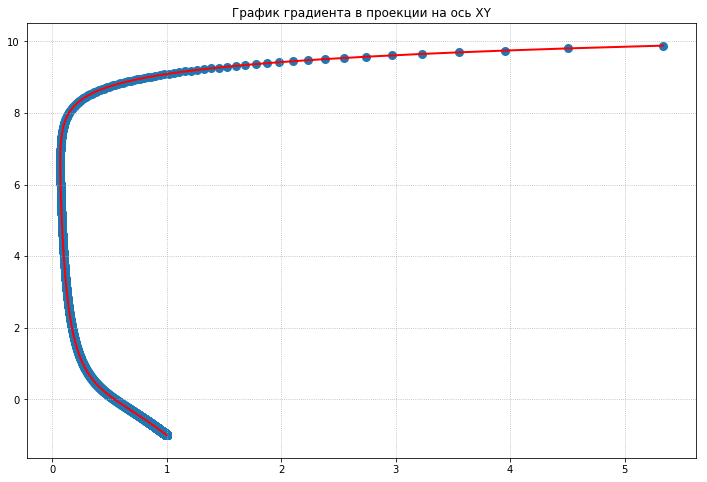

In [131]:
def gradient_descent(a, x_k, y_k): #в качестве параметра будем подставлять alpha и координаты точки старта
    eps = 1e-10 #эпсилон для критерия остановки                       поиска минимума функции
    stop_criterion = 1 #критерий остановки
    while(stop_criterion > eps):
        x_k1 = x_k - a * gradient_x(x_k, y_k) #считаем значение
        y_k1 = y_k - a * gradient_y(x_k, y_k) #градиента в точках
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2) #обновляем критерий остановки
        x_k = x_k1 #обновляем значения
        y_k = y_k1 #x_k и y_k
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

min_x, min_y = gradient_descent(0.001, 7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Действительно, найдена пренебрежимо малую величину точка минимума')
print('Количество итераций: ', end = '')
print(len(Z1))

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = x ** 2 + y ** 2
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1[15:], Y1[15:], Z1[15:], color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется градиентный спуск, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
#plt.gca().view_init(90, 90)
plt.show()
print('Теперь посмотрим на проекцию градиентного спуска на ось XY. Он стремится к точке (-1, 1).')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График градиента в проекции на ось XY')
plt.grid(ls=':')
plt.show()

### 2. Метод тяжёлого шарика
$x^{[k+1]} = x^{[k]} - \lambda^{[k]}\nabla f(x^{[k]} + \beta^{[k]}(x^{[k]} - x^{[k - 1]}))$

Сначала рассмотрим самую первую нашу функцию $f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$ с постоянными значениями параметра $\alpha = \beta = 0.001$

In [147]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

In [148]:
X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

In [149]:
def heavy_ball_method(a, b, x_k, y_k): #в качестве параметра будем подставлять alpha и координаты точки старта
    eps = 1e-10 #эпсилон для критерия остановки                       поиска минимума функции
    stop_criterion = 1 #критерий остановки
    x_km = x_k #начальные
    y_km = y_k #значения
    while(stop_criterion > eps):
        x_k1 = x_k - a * gradient_x(x_k) + b * (x_k - x_km) #считаем значение
        y_k1 = y_k - a * gradient_y(y_k) + b * (y_k - y_km) #градиента в точках
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2) #обновляем критерий остановки
        x_km = x_k
        y_km = y_k
        x_k = x_k1 #обновляем значения
        y_k = y_k1 #x_k и y_k
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

In [150]:
min_x, min_y = heavy_ball_method(0.001, 0.001, 7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

Координата x, найденная градиентным спуском: 2.4796446065269357e-08
Координата y, найденная градиентным спуском: 1.0000000000000138
Количество итераций : 4850


Видим, что метод тяжёлого шарика работает быстрее чем градиентный спуск при одиноковой функции и параметрах.

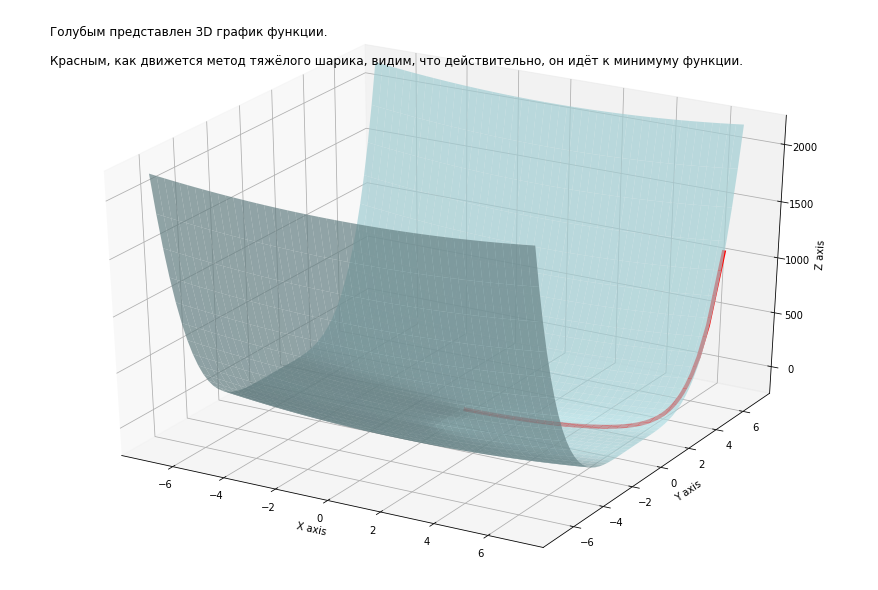

Теперь посмотрим на проекцию метода тяжёлого шарика на ось XY. Он стремится к точке (0, 1).
Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.


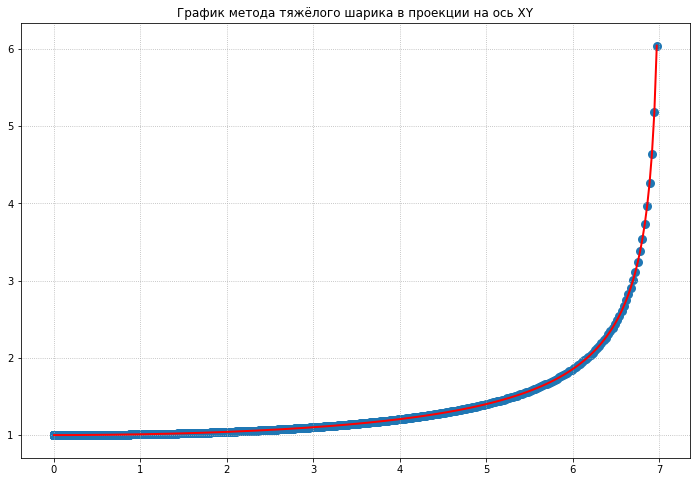

In [151]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1, Y1, Z1, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется метод тяжёлого шарика, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Теперь посмотрим на проекцию метода тяжёлого шарика на ось XY. Он стремится к точке (0, 1).')
print('Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График метода тяжёлого шарика в проекции на ось XY')
plt.grid(ls=':')
plt.show()

Теперь посмотрим, что будет происходить, если взять $\alpha$ не const, а дробным шагом, где $\frac{1}{n}$, где $n$ номер итерации плюс 1000, чтобы не случился 'Numerical result out of range'.

In [108]:
def heavy_ball_method(x_k, y_k): #в качестве параметра будем подставлять alpha и координаты точки старта
    eps = 1e-10 #эпсилон для критерия остановки                       поиска минимума функции
    stop_criterion = 1 #критерий остановки
    x_km = x_k #начальные
    y_km = y_k #значения
    n = 1000
    while(stop_criterion > eps):
        x_k1 = x_k - (1 / n) * gradient_x(x_k) + (1 / n) * (x_k - x_km) #считаем значение
        y_k1 = y_k - (1 / n) * gradient_y(y_k) + (1 / n) * (y_k - y_km) #градиента в точках
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2) #обновляем критерий остановки
        x_km = x_k
        y_km = y_k
        x_k = x_k1 #обновляем значения
        y_k = y_k1 #x_k и y_k
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
        n = n + 1
    return x_k, y_k

In [109]:
min_x, min_y = heavy_ball_method(7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

Координата x, найденная градиентным спуском: 1.2193415832735905e-06
Координата y, найденная градиентным спуском: 1.0000000000004354
Количество итераций : 100412


Видим, что требуется намного больше итераций.

Рассмотрим сильно выпуклую функцию $f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$, её минимум это точка $(1, -1)$

In [143]:
def f(x, y):
    return (1 - x) ** 2 + (y + x ** 2) ** 2

def gradient_x(point_x, point_y):
    return -2 + 2 * point_x + 4 * point_x * point_y + 4 * point_x ** 3

def gradient_y(point_x, point_y):
    return 2 * point_y + 2 * point_x ** 2

Координата x, найденная градиентным спуском: 0.9999998886352013
Координата y, найденная градиентным спуском: -0.999999731141601
Количество итераций : 44803


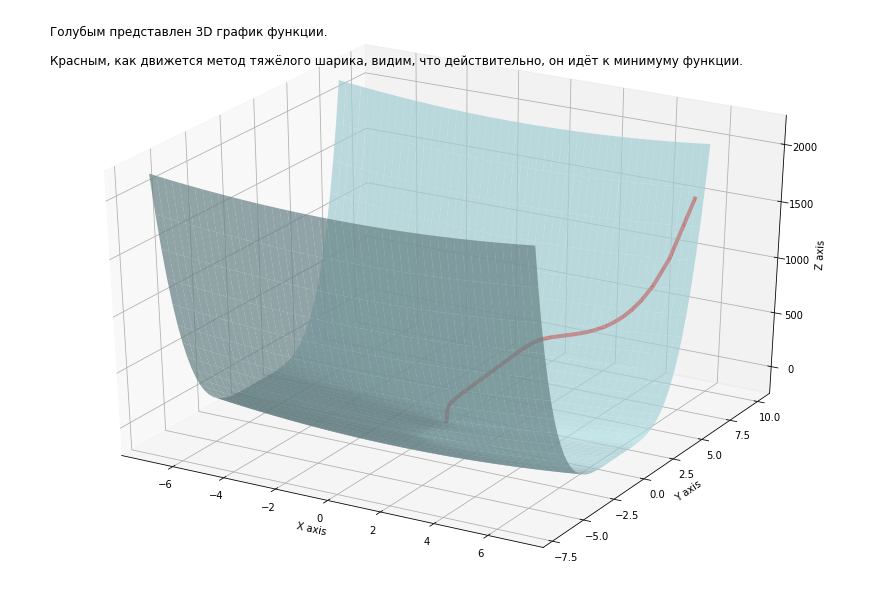

Теперь посмотрим на проекцию метода тяжёлого шарика на ось XY. Он стремится к точке (1, -1).
Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.


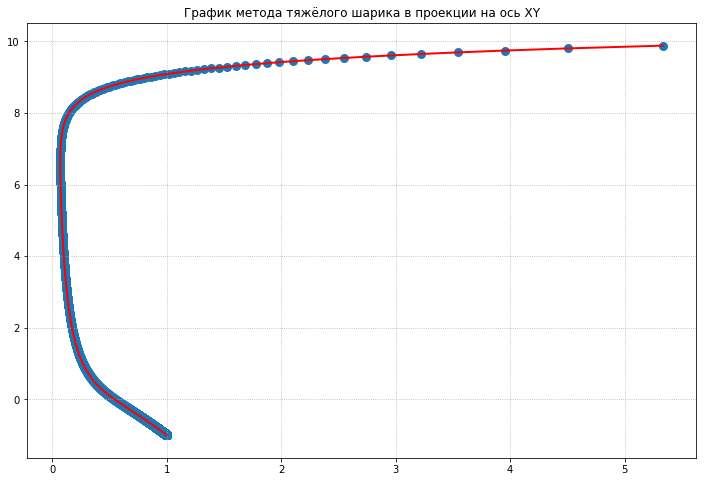

In [146]:
X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

def heavy_ball_method(a, b, x_k, y_k): #в качестве параметра будем подставлять alpha и координаты точки старта
    eps = 1e-10 #эпсилон для критерия остановки                       поиска минимума функции
    stop_criterion = 1 #критерий остановки
    x_km = x_k #начальные
    y_km = y_k #значения
    while(stop_criterion > eps):
        x_k1 = x_k - a * gradient_x(x_k, y_k) + b * (x_k - x_km) #считаем значение
        y_k1 = y_k - a * gradient_y(x_k, y_k) + b * (y_k - y_km) #градиента в точках
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2) #обновляем критерий остановки
        x_km = x_k
        y_km = y_k
        x_k = x_k1 #обновляем значения
        y_k = y_k1 #x_k и y_k
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

min_x, min_y = heavy_ball_method(0.001, 0.001, 7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1, Y1, Z1, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется метод тяжёлого шарика, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Теперь посмотрим на проекцию метода тяжёлого шарика на ось XY. Он стремится к точке (1, -1).')
print('Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График метода тяжёлого шарика в проекции на ось XY')
plt.grid(ls=':')
plt.show()

### 3. Метод сопряжённых градиентов
$x^{[k+1]} = x^{[k]} - \lambda^{[k]}\nabla f(x^{[k]} + \beta^{[k]}(x^{[k]} - x^{[k - 1]}))$ <br>
$\alpha_{k}, \beta_{k} = argmin_{\alpha, \beta} f (x_{k} - \lambda^{[k]}\nabla f(x^{[k]}) - \beta^{[k]}(x^{[k]} - x^{[k - 1]})))$

In [85]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

In [86]:
X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

In [87]:
def find_argmin(x_k, y_k, x_km, y_km):
    all = []
    for a in mb_x:
        for b in mb_y:
            xf = x_k - a * gradient_x(x_k) - b * (x_k - x_km)
            yf = y_k - a * gradient_y(y_k) - b * (y_k - y_km)
            all.append(f(xf, yf))
    n = np.argmin(all)
    nx = n // 80
    ny = n % 80
    return [mb_x[nx], mb_y[ny]]
            

def conjugate_gradient_method(x_k, y_k):
    x_km = x_k
    y_km = y_k
    eps = 1e-10 #эпсилон для критерия остановки
    stop_criterion = 1 #критерий остановки
    while(stop_criterion > eps):
        r = find_argmin(x_k, y_k, x_km, y_km)
        #print(r)
        x_k1 = x_k - r[0] * gradient_x(x_k) + r[1] * (x_k - x_km)
        y_k1 = y_k - r[0] * gradient_y(y_k) + r[1] * (y_k - y_km)
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2)
        #print(f(x_k1, y_k1))
        x_km = x_k
        y_km = y_k
        x_k = x_k1
        y_k = y_k1
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

In [88]:
min_x, min_y = conjugate_gradient_method(7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

Координата x, найденная градиентным спуском: 2.49814899487254e-07
Координата y, найденная градиентным спуском: -0.9999999999999987
Количество итераций : 2017


Найденная точка $(0, -1)$ является седловой точкой функции. Метод зашёл в неё и не может выйти.

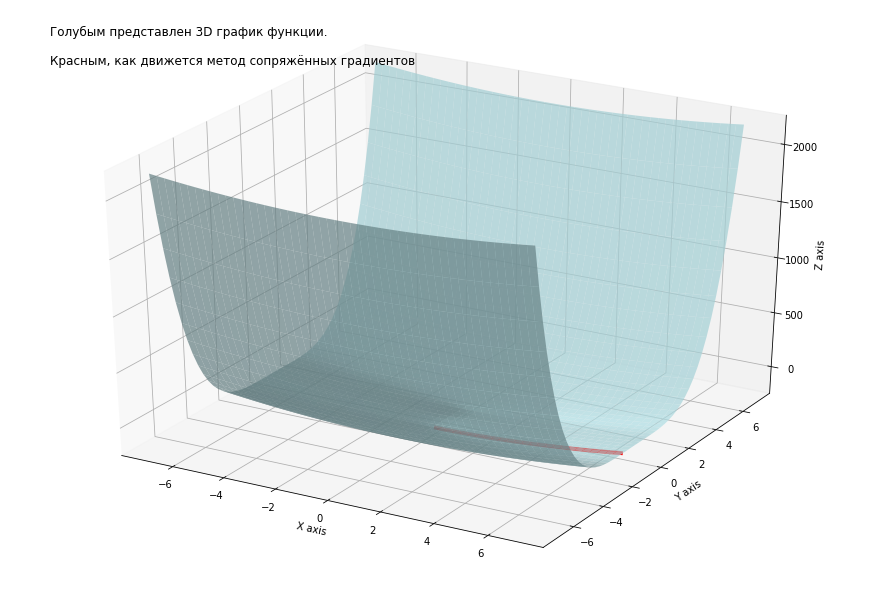

Теперь посмотрим на проекцию метода сопряжённых градиентов на ось XY. Он стремится к точке (0, -1).
Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.


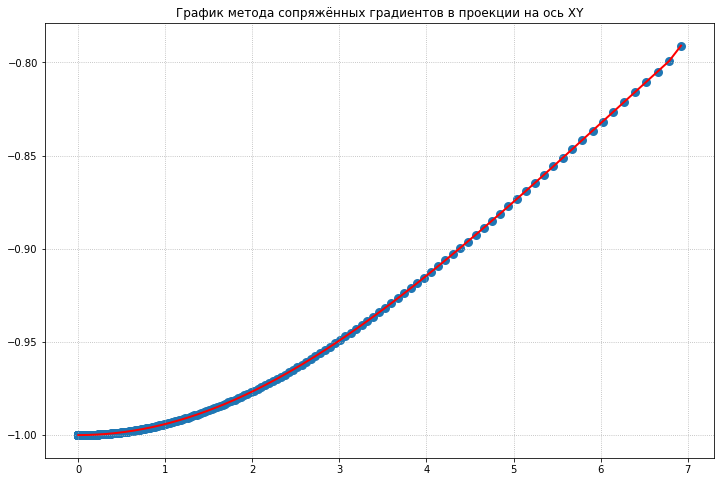

In [89]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1, Y1, Z1, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется метод сопряжённых градиентов", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Теперь посмотрим на проекцию метода сопряжённых градиентов на ось XY. Он стремится к точке (0, -1).')
print('Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График метода сопряжённых градиентов в проекции на ось XY')
plt.grid(ls=':')
plt.show()

Рассмотрим сильно выпуклую функцию $f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$, её минимум это точка $(1, -1)$

In [135]:
def f(x, y):
    return (1 - x) ** 2 + (y + x ** 2) ** 2

def gradient_x(point_x, point_y):
    return -2 + 2 * point_x + 4 * point_x * point_y + 4 * point_x ** 3

def gradient_y(point_x, point_y):
    return 2 * point_y + 2 * point_x ** 2

Координата x, найденная градиентным спуском: 0.999999977349064
Координата y, найденная градиентным спуском: -0.9999999453158034
Количество итераций : 10064


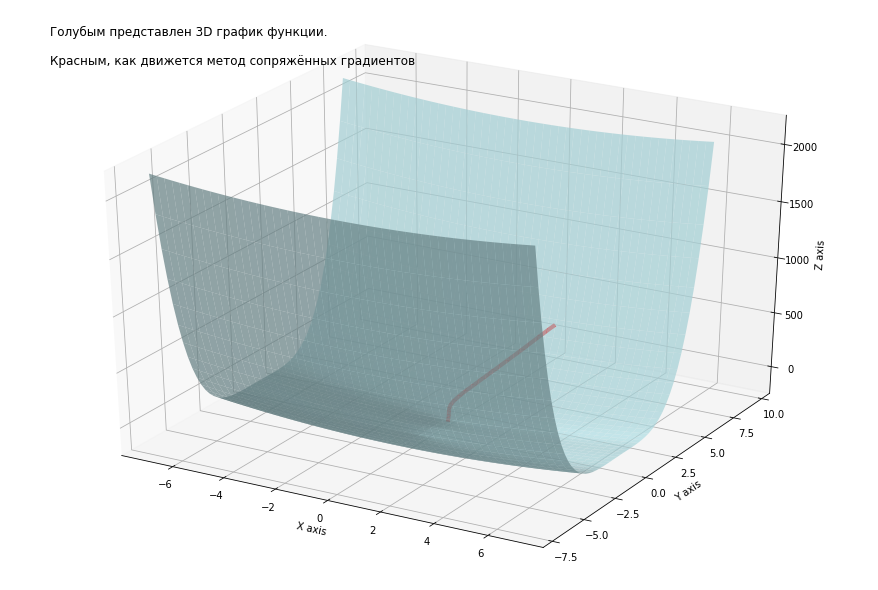

Теперь посмотрим на проекцию метода сопряжённых градиентов на ось XY. Он стремится к точке (1, -1).
Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.


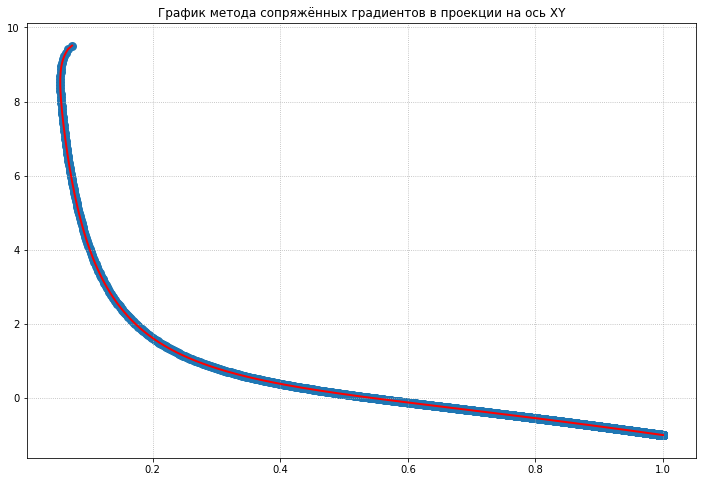

In [137]:
X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

def find_argmin(x_k, y_k, x_km, y_km):
    all = []
    for a in mb_x:
        for b in mb_y:
            xf = x_k - a * gradient_x(x_k, y_k) - b * (x_k - x_km)
            yf = y_k - a * gradient_y(x_k, y_k) - b * (y_k - y_km)
            all.append(f(xf, yf))
    n = np.argmin(all)
    nx = n // 80
    ny = n % 80
    return [mb_x[nx], mb_y[ny]]
            

def conjugate_gradient_method(x_k, y_k):
    x_km = x_k
    y_km = y_k
    eps = 1e-10 #эпсилон для критерия остановки
    stop_criterion = 1 #критерий остановки
    while(stop_criterion > eps):
        r = find_argmin(x_k, y_k, x_km, y_km)
        x_k1 = x_k - r[0] * gradient_x(x_k, y_k) + r[1] * (x_k - x_km)
        y_k1 = y_k - r[0] * gradient_y(x_k, y_k) + r[1] * (y_k - y_km)
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2)
        x_km = x_k
        y_km = y_k
        x_k = x_k1
        y_k = y_k1
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

min_x, min_y = conjugate_gradient_method(7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1, Y1, Z1, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется метод сопряжённых градиентов", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Теперь посмотрим на проекцию метода сопряжённых градиентов на ось XY. Он стремится к точке (1, -1).')
print('Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График метода сопряжённых градиентов в проекции на ось XY')
plt.grid(ls=':')
plt.show()

### 4. Ускоренный метод Нестерова
$x^{[k+1]} = x^{[k]} - \lambda^{[k]}\nabla f(x^{[k]} + \beta^{[k]}(x^{[k]} - x^{[k - 1]})) + \beta^{[k]}(x^{[k]} - x^{[k - 1]})$

In [90]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

In [98]:
X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

In [99]:
def reinforced_gradient_method(a, b, x_k, y_k):
    x_km = x_k
    y_km = y_k
    eps = 1e-10 #эпсилон для критерия остановки
    stop_criterion = 1 #критерий остановки
    while(stop_criterion > eps):
        x_k1 = x_k - a * gradient_x(x_k + b * (x_k - x_km)) + b * (x_k - x_km)
        y_k1 = y_k - a * gradient_y(y_k + b * (y_k - y_km)) + b * (y_k - y_km)
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2)
        x_km = x_k
        y_km = y_k
        x_k = x_k1
        y_k = y_k1
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

In [100]:
min_x, min_y = reinforced_gradient_method(0.001, 0.001, 7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

Координата x, найденная градиентным спуском: 2.4798389347099272e-08
Координата y, найденная градиентным спуском: 1.0000000000000138
Количество итераций : 4850


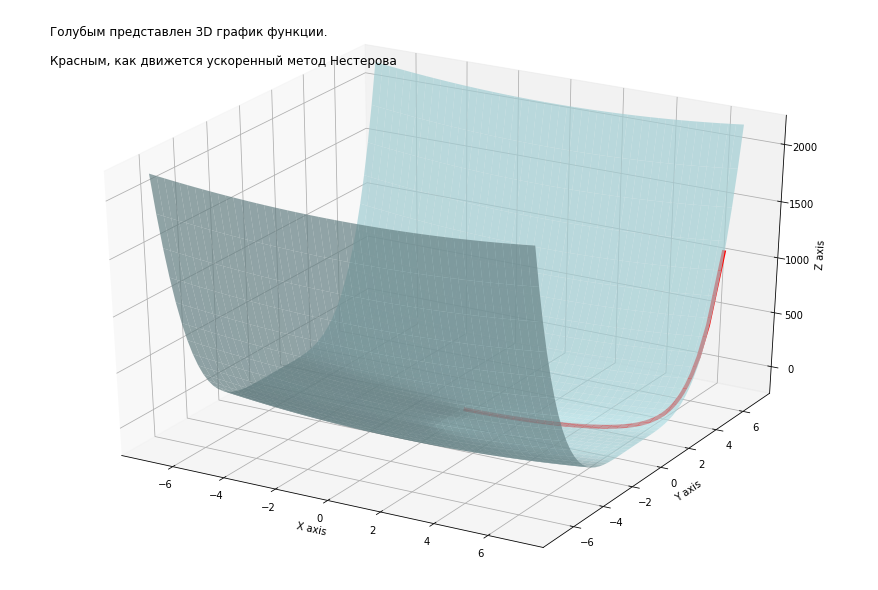

Теперь посмотрим на проекцию ускоренного метода Нестерова на ось XY. Он стремится к точке (0, 1).
Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.


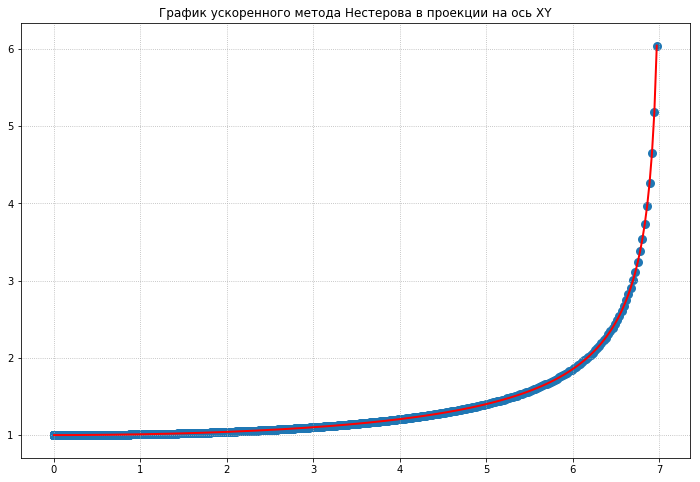

In [102]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1, Y1, Z1, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется ускоренный метод Нестерова", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Теперь посмотрим на проекцию ускоренного метода Нестерова на ось XY. Он стремится к точке (0, 1).')
print('Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График ускоренного метода Нестерова в проекции на ось XY')
plt.grid(ls=':')
plt.show()

Теперь посмотрим, что будет происходить, если взять $\alpha$ не const, а дробным шагом, где $\frac{1}{n}$, где $n$ номер итерации плюс 1000, чтобы не случился 'Numerical result out of range'.

In [106]:
def reinforced_gradient_method(x_k, y_k):
    x_km = x_k
    y_km = y_k
    eps = 1e-10 #эпсилон для критерия остановки
    stop_criterion = 1 #критерий остановки
    n = 1000
    while(stop_criterion > eps):
        x_k1 = x_k - (1 / n) * gradient_x(x_k + (1 / n) * (x_k - x_km)) + (1 / n) * (x_k - x_km)
        y_k1 = y_k - (1 / n) * gradient_y(y_k + (1 / n) * (y_k - y_km)) + (1 / n) * (y_k - y_km)
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2)
        x_km = x_k
        y_km = y_k
        x_k = x_k1
        y_k = y_k1
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
        n = n + 1
    return x_k, y_k

In [107]:
min_x, min_y = reinforced_gradient_method(7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

Координата x, найденная градиентным спуском: 1.2193513960887343e-06
Координата y, найденная градиентным спуском: 1.0000000000004354
Количество итераций : 52631


Видим, что требуется намного больше итераций.

Рассмотрим сильно выпуклую функцию $f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$, её минимум это точка $(1, -1)$

In [138]:
def f(x, y):
    return (1 - x) ** 2 + (y + x ** 2) ** 2

def gradient_x(point_x, point_y):
    return -2 + 2 * point_x + 4 * point_x * point_y + 4 * point_x ** 3

def gradient_y(point_x, point_y):
    return 2 * point_y + 2 * point_x ** 2

Координата x, найденная градиентным спуском: 0.9999998884931419
Координата y, найденная градиентным спуском: -0.9999997307851943
Количество итераций : 44854


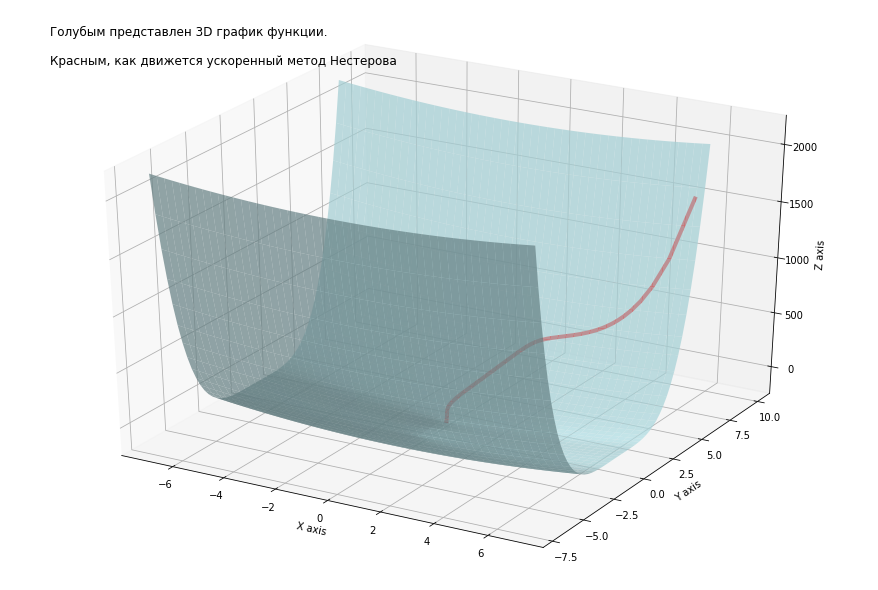

Теперь посмотрим на проекцию ускоренного метода Нестерова на ось XY. Он стремится к точке (1, -1).
Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.


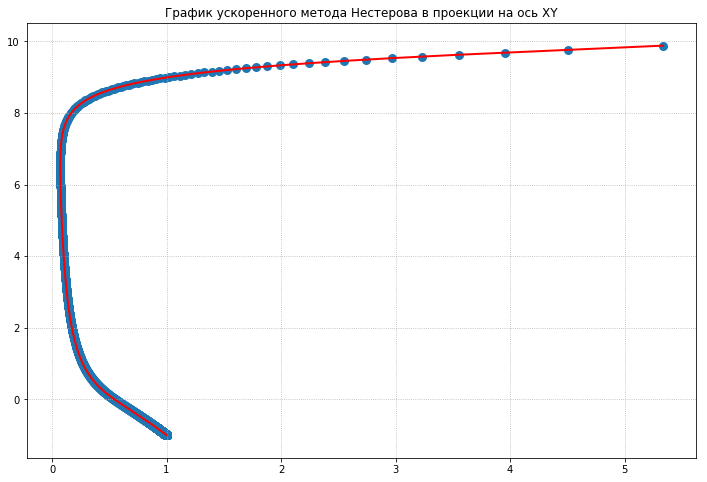

In [142]:
X1 = [] #значение градиента по оси X
Y1 = [] #значение градиента по оси Y
Z1 = [] #значение градиента по оси Z

#здесь данные для построения графика нашей функции
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

def reinforced_gradient_method(a, b, x_k, y_k):
    x_km = x_k
    y_km = y_k
    eps = 1e-10 #эпсилон для критерия остановки
    stop_criterion = 1 #критерий остановки
    while(stop_criterion > eps):
        x_k1 = x_k - a * gradient_x(x_k + b * (x_k - x_km), y_k) + b * (x_k - x_km)
        y_k1 = y_k - a * gradient_y(x_km, y_k + b * (y_k - y_k)) + b * (y_k - y_km)
        stop_criterion = math.sqrt((x_k - x_k1) ** 2 + (y_k - y_k1) ** 2)
        x_km = x_k
        y_km = y_k
        x_k = x_k1
        y_k = y_k1
        X1.append(x_k1)
        Y1.append(y_k1)
        Z1.append(f(x_k1, y_k1))
    return x_k, y_k

min_x, min_y = reinforced_gradient_method(0.001, 0.001, 7, 10)
print('Координата x, найденная градиентным спуском: ', end = '')
print(min_x)
print('Координата y, найденная градиентным спуском: ', end = '')
print(min_y)
print('Количество итераций : ', end = '')
print(len(Z1))

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1, Y1, Z1, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется ускоренный метод Нестерова", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Теперь посмотрим на проекцию ускоренного метода Нестерова на ось XY. Он стремится к точке (1, -1).')
print('Также, заметим, что с увеличением итерации, расстояние между точками уменьшается.')
fig = plt.figure()
plt.plot(X1, Y1, color='r', linewidth = 2)
plt.scatter(X1, Y1, linewidths = 3)
plt.title('График ускоренного метода Нестерова в проекции на ось XY')
plt.grid(ls=':')
plt.show()

## Вывод: 
Было проведено исследование 4 алгоритмов поиска локального минимума на двух функциях. Действительно, все алгоритмы нашли локальный минимум функций, кроме метода сопряжённых градиентов: в одном случае он действительно нашёл минимум, а в другом угодил в седло. Теперь рассмотрим таблицу, которая показывает какое количество итераций было затрачено каждым методом для двух функций.

Метод|$f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$|$f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$
-----|---------------|----------------------------------------
Градиентный спуск|..............................4854..............................|..............................44845..............................
Метод тяжёлого шарика|..............................4850..............................|..............................44803..............................
Метод сопряжённого градиента|..............................2017..............................|..............................10064..............................
Ускоренный метод Нестерова|..............................4850..............................|..............................52631..............................

Как можем видеть, метод сопряжённого градиента самый быстрый. Также было проведено исследование, что лучше всего брать в качестве параметров. Постоянный параметр по сравнению с $\frac{1}{n}$ параметром выигрывает по числу итераций и такой же по точности. Также было проведено исследование для градиентного спуска с параметром $\alpha$. Было получено, что так как сама функция сама по себе быстро растёт, примерно для $\alpha = 0.005$ начинают появляться очень большие значения функции и минимум никак не булет найден. Из этого можно сделать вывод, что параметр следует выбирать маленький, несмотря на то что количество итераций будет расти.